# Supermarket_sales analysis with Pandas (EDA)

# Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('supermarket_sales.csv')

In [7]:
df.tail(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
993,690-01-6631,B,Mandalay,Normal,Male,Fashion accessories,NaN,10.0,8.7450,183.6450,2/22/19,18:35,Ewallet,174.90,4.761905,8.7450,6.6
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,NaN,1.0,3.0475,63.9975,2/18/19,11:40,Ewallet,60.95,4.761905,3.0475,5.9
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,NaN,1.0,2.0175,42.3675,1/29/19,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,NaN,10.0,48.6900,1022.4900,3/2/19,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,NaN,1.0,1.5920,33.4320,2/9/19,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1.0,3.2910,69.1110,2/22/19,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.9190,649.2990,2/18/19,13:28,Cash,618.38,4.761905,30.9190,6.6
1000,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.9190,649.2990,2/18/19,13:28,Cash,618.38,4.761905,30.9190,6.6
1001,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,NaN,2.0,5.8030,121.8630,3/10/19,20:46,Ewallet,116.06,4.761905,5.8030,8.8
1002,452-04-8808,B,Mandalay,Normal,Male,Electronic accessories,87.08,NaN,30.4780,640.0380,1/26/19,15:17,Cash,609.56,4.761905,30.4780,5.5


In [8]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [13]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                          float64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [11]:
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
df.set_index('Date',inplace=True)

In [18]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [19]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,996.000000,983.000000,1003.000000,1003.000000,1003.000000,1.003000e+03,1003.000000,1003.000000
mean,55.764568,5.501526,15.400368,323.407726,308.007358,4.761905e+00,15.400368,6.972682
std,26.510165,2.924673,11.715192,246.019028,234.303836,6.220351e-14,11.715192,1.717647
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905e+00,0.508500,4.000000
25%,33.125000,3.000000,5.894750,123.789750,117.895000,4.761905e+00,5.894750,5.500000
50%,55.420000,5.000000,12.096000,254.016000,241.920000,4.761905e+00,12.096000,7.000000
75%,78.085000,8.000000,22.539500,473.329500,450.790000,4.761905e+00,22.539500,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905e+00,49.650000,10.000000


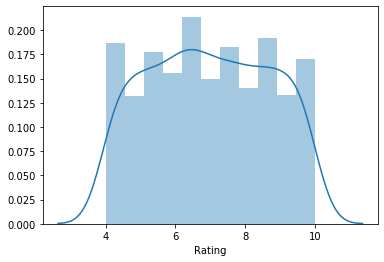

In [20]:
sns.distplot(df['Rating'])

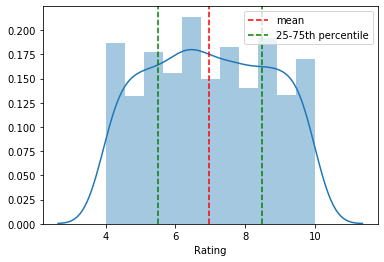

In [25]:
sns.distplot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']),c='red',ls='--',label='mean')
plt.axvline(x=np.percentile(df['Rating'],25),c='green',ls='--',label='25-75th percentile')
plt.axvline(x=np.percentile(df['Rating'],75),c='green',ls='--')
plt.legend()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000FCEFAC7DC8>,
      dtype=object)

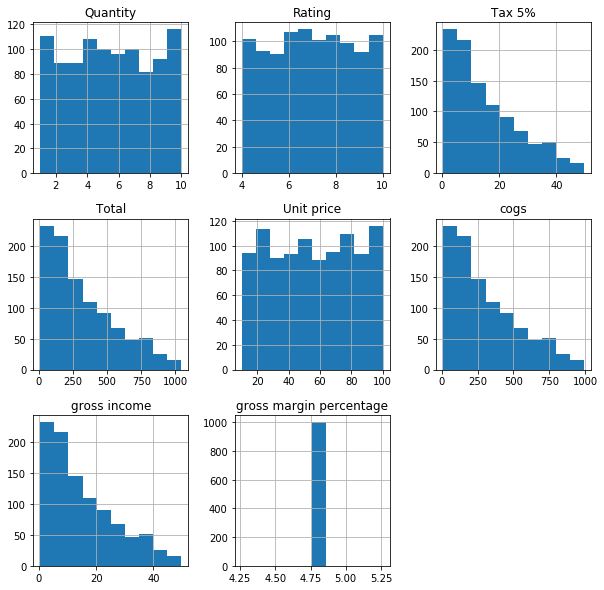

In [27]:
df.hist(figsize=(10,10))

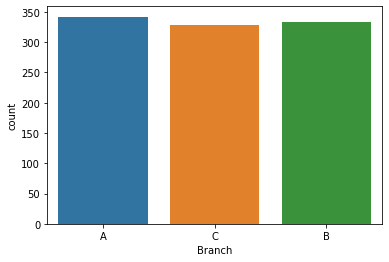

In [28]:
sns.countplot(df['Branch'])

In [29]:
df['Branch'].value_counts()

A    342
B    333
C    328
Name: Branch, dtype: int64

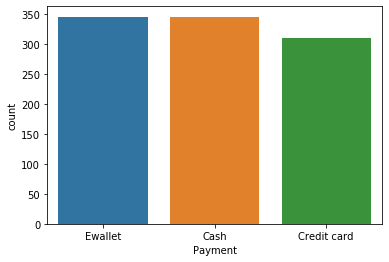

In [30]:
sns.countplot(df['Payment'])

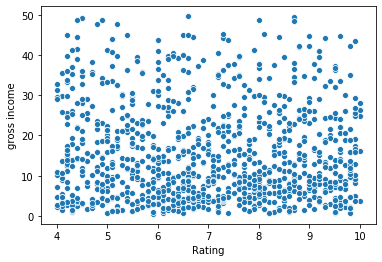

In [31]:
sns.scatterplot(df['Rating'],df['gross income'])

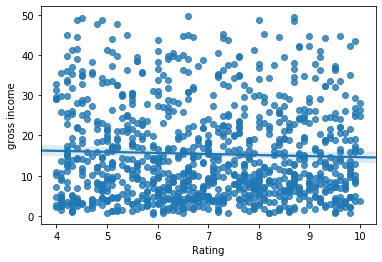

In [32]:
sns.regplot(df['Rating'],df['gross income'])

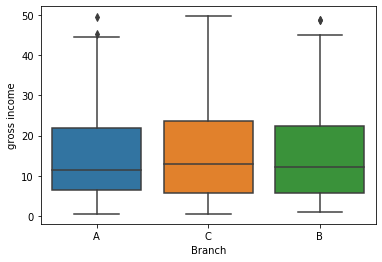

In [33]:
sns.boxplot(x=df['Branch'],y=df['gross income'])

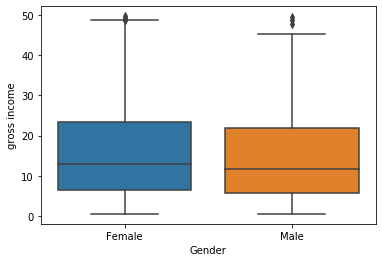

In [34]:
sns.boxplot(x=df['Gender'],y=df['gross income'])

In [35]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [36]:
df.groupby(df.index).mean()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,
2019-01-01,54.995833,6.454545,18.830083,395.431750,376.601667,4.761905,18.830083,6.583333
2019-01-02,44.635000,6.000000,11.580375,243.187875,231.607500,4.761905,11.580375,6.050000
2019-01-03,59.457500,4.625000,12.369813,259.766062,247.396250,4.761905,12.369813,8.112500
2019-01-04,51.743333,5.333333,12.886417,270.614750,257.728333,4.761905,12.886417,6.516667
2019-01-05,61.636667,4.583333,14.034458,294.723625,280.689167,4.761905,14.034458,7.433333
...,...,...,...,...,...,...,...,...
2019-03-26,42.972308,4.000000,7.188692,150.962538,143.773846,4.761905,7.188692,6.623077
2019-03-27,56.841000,4.500000,13.822950,290.281950,276.459000,4.761905,13.822950,6.760000
2019-03-28,45.525000,4.800000,10.616200,222.940200,212.324000,4.761905,10.616200,7.050000


In [37]:
df.groupby(df.index).mean().index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
               '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20',
               '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-02', '2019-02-03', '2019-02-04', '2019-02-05',
               '2019-02-06', '2019-02-07', '2019-02-08', '2019-02-09',
               '2019-02-10', '2019-02-11', '2019-02-12', '2019-02-13',
               '2019-02-14', '2019-02-15', '2019-02-16', '2019-02-17',
               '2019-02-18', '2019-02-19', '2019-02-20', '2019-02-21',
               '2019-02-22', '2019-02-23', '2019-02-24', '2019-02-25',
      

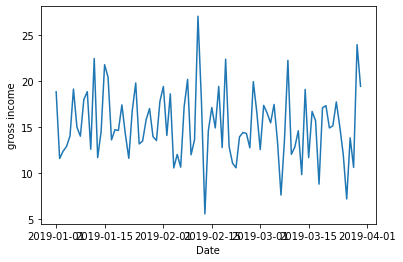

In [38]:
sns.lineplot(x=df.groupby(df.index).mean().index,y=df.groupby(df.index).mean()['gross income'])

C:\Users\Admin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Admin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


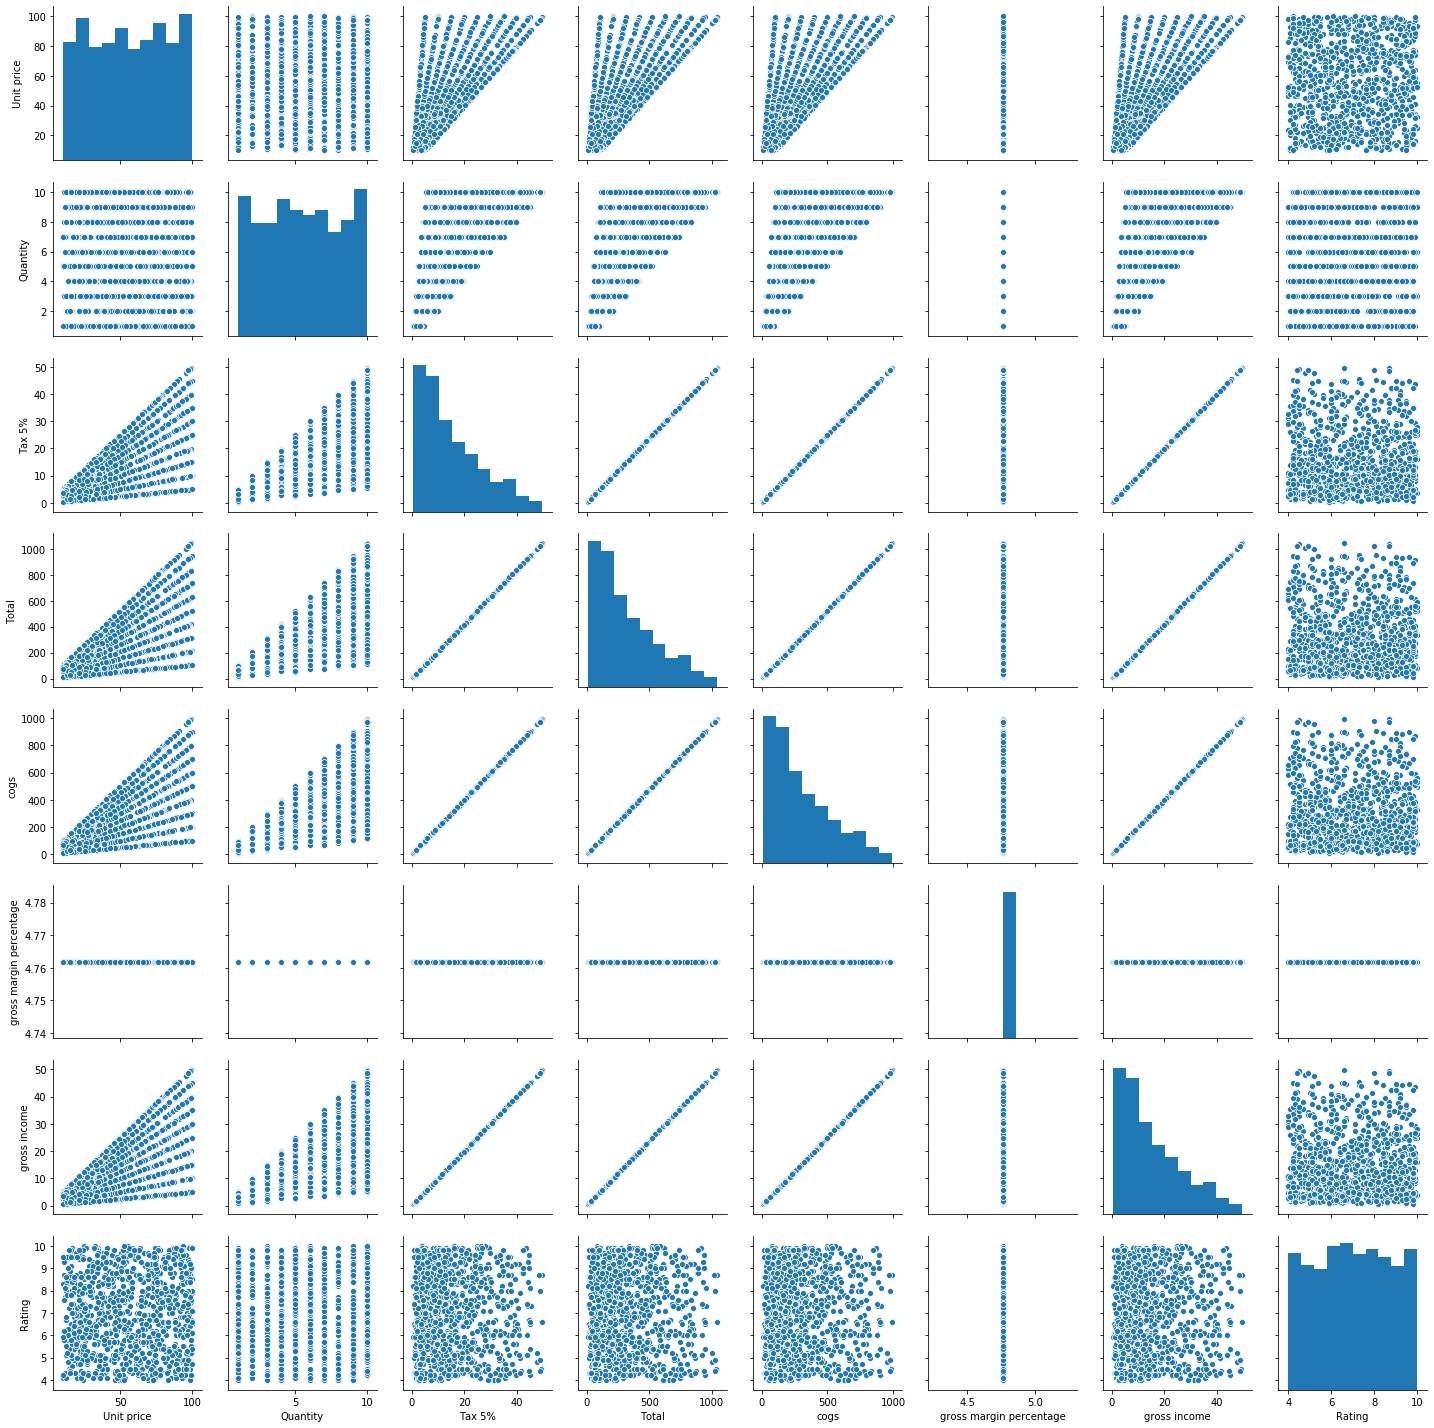

In [39]:
sns.pairplot(df)

In [41]:
df.duplicated().sum()

3

In [44]:
df[df.duplicated()==True]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-02-18,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.919,649.299,13:28,Cash,618.38,4.761905,30.919,6.6
2019-03-10,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,NaN,2.0,5.803,121.863,20:46,Ewallet,116.06,4.761905,5.803,8.8
2019-01-26,452-04-8808,B,Mandalay,Normal,Male,Electronic accessories,87.08,NaN,30.478,640.038,15:17,Cash,609.56,4.761905,30.478,5.5


In [55]:
df.isna().sum()

Invoice ID                  0
Branch                      0
City                        0
Customer type              79
Gender                      0
Product line               43
Unit price                  7
Quantity                   20
Tax 5%                      0
Total                       0
Time                        0
Payment                     0
cogs                        0
gross margin percentage     0
gross income                0
Rating                      0
dtype: int64

In [63]:
df.isna().sum()/len(df)

Invoice ID                 0.000000
Branch                     0.000000
City                       0.000000
Customer type              0.078764
Gender                     0.000000
Product line               0.042871
Unit price                 0.000000
Quantity                   0.000000
Tax 5%                     0.000000
Total                      0.000000
Time                       0.000000
Payment                    0.000000
cogs                       0.000000
gross margin percentage    0.000000
gross income               0.000000
Rating                     0.000000
dtype: float64

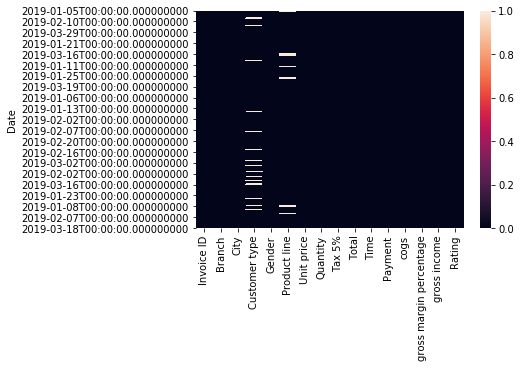

In [62]:
sns.heatmap(df.isnull())

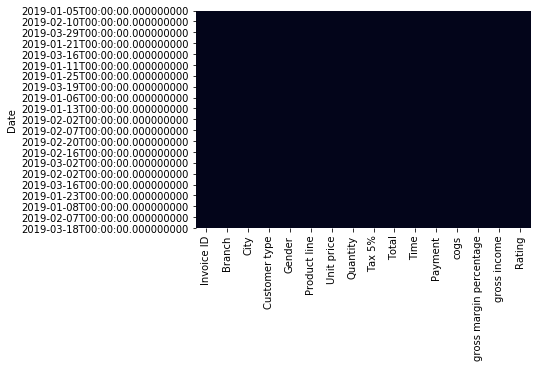

In [67]:
sns.heatmap(df.isnull(),cbar=False)

In [60]:
df.fillna(df.mean(),inplace=True)

In [65]:
df.mode().iloc[0]

Invoice ID                         452-04-8808
Branch                                       A
City                                    Yangon
Customer type                           Normal
Gender                                  Female
Product line               Fashion accessories
Unit price                             55.7646
Quantity                                    10
Tax 5%                                   4.154
Total                                   87.234
Time                                     14:42
Payment                                   Cash
cogs                                     83.08
gross margin percentage                 4.7619
gross income                             4.154
Rating                                       6
Name: 0, dtype: object

In [66]:
df.fillna(df.mode().iloc[0],inplace=True)

In [71]:
np.corrcoef(df['gross income'],df['Rating'])

array([[ 1.       , -0.0385905],
       [-0.0385905,  1.       ]])

In [73]:
np.corrcoef(df['gross income'],df['Rating'])[1][0]

-0.03859050133949411

In [74]:
round(np.corrcoef(df['gross income'],df['Rating'])[1][0],2)

-0.04

In [75]:
df.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000e+00,1.538256e-02,6.299835e-01,6.299835e-01,6.299835e-01,4.010656e-16,6.299835e-01,-7.869869e-03
Quantity,1.538256e-02,1.000000e+00,7.036965e-01,7.036965e-01,7.036965e-01,-3.837818e-15,7.036965e-01,-2.258608e-02
Tax 5%,6.299835e-01,7.036965e-01,1.000000e+00,1.000000e+00,1.000000e+00,7.550419e-17,1.000000e+00,-3.859050e-02
Total,6.299835e-01,7.036965e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.977497e-16,1.000000e+00,-3.859050e-02
cogs,6.299835e-01,7.036965e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.438396e-15,1.000000e+00,-3.859050e-02
gross margin percentage,4.010656e-16,-3.837818e-15,7.550419e-17,2.977497e-16,1.438396e-15,1.000000e+00,7.550419e-17,2.362780e-15
gross income,6.299835e-01,7.036965e-01,1.000000e+00,1.000000e+00,1.000000e+00,7.550419e-17,1.000000e+00,-3.859050e-02
Rating,-7.869869e-03,-2.258608e-02,-3.859050e-02,-3.859050e-02,-3.859050e-02,2.362780e-15,-3.859050e-02,1.000000e+00


In [76]:
np.round(df.corr(),2)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.00,0.02,0.63,0.63,0.63,0.0,0.63,-0.01
Quantity,0.02,1.00,0.70,0.70,0.70,-0.0,0.70,-0.02
Tax 5%,0.63,0.70,1.00,1.00,1.00,0.0,1.00,-0.04
Total,0.63,0.70,1.00,1.00,1.00,0.0,1.00,-0.04
cogs,0.63,0.70,1.00,1.00,1.00,0.0,1.00,-0.04
gross margin percentage,0.00,-0.00,0.00,0.00,0.00,1.0,0.00,0.00
gross income,0.63,0.70,1.00,1.00,1.00,0.0,1.00,-0.04
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,0.0,-0.04,1.00


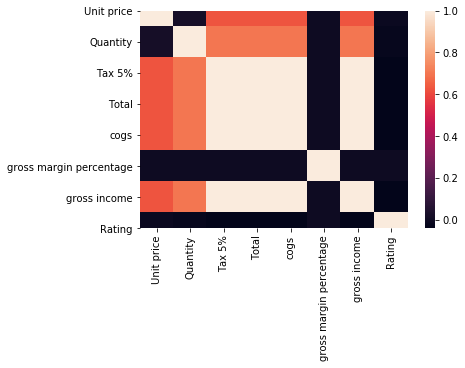

In [77]:
sns.heatmap(np.round(df.corr(),2))

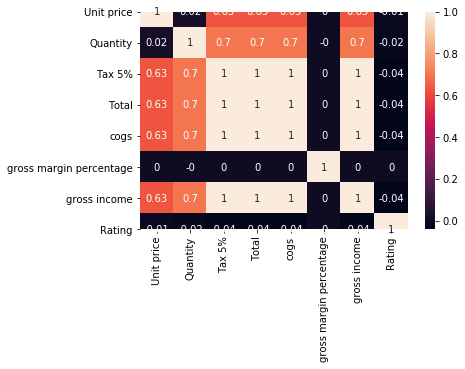

In [78]:
sns.heatmap(np.round(df.corr(),2),annot=True)